best features

In [2]:
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pandas as pd
import numpy as np 
import twoSig_comp as ts
from sklearn.linear_model import LinearRegression, Lasso
import data_utils as du

In [5]:
reload(ts)
ss = ts.TwoSig(fn='/Users/leiyao/data/kaggle_2sig/train_small.h5')
df = ss._df[ss._df['timestamp']<=300].copy()
ef = ss._df

In [44]:
ymax = ef['y'].max()
ymin = ef['y'].min()

In [24]:
feat = [c for c in ef if c.startswith('t_')]\
        + [c for c in ef if c.startswith('f_')]\
        + [c for c in ef if c.startswith('d_')]

In [25]:
dat = [] 
for ft in feat:
    v = ef[[ft, 'y']].corr().iloc[0,1]
    dat.append((ft, v))

In [26]:
res = pd.DataFrame(dat, columns=['feat', 'value'])\
        .sort_values(by='value')\
        .set_index('feat')

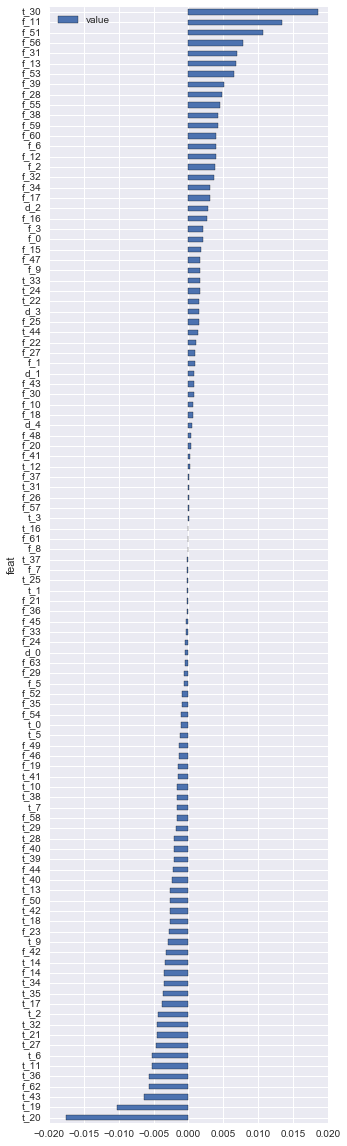

In [28]:
res.plot(kind='barh', figsize=(5,20))

In [29]:
res[ res['value'].abs()>0.01]

,value
feat,
t_20,-0.017515
t_19,-0.010242
f_51,0.010715
f_11,0.013421
t_30,0.018548


In [31]:
feat_selected = res[ res['value'].abs()>0.01].index.tolist()

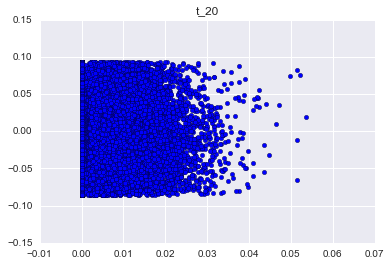

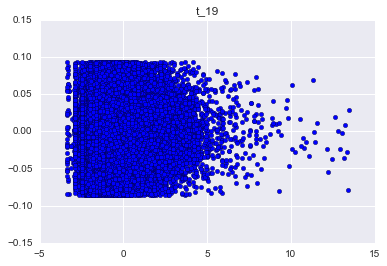

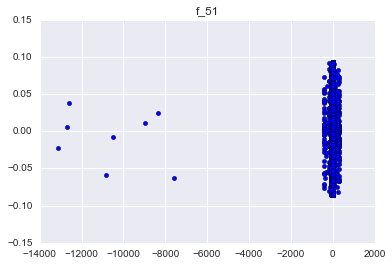

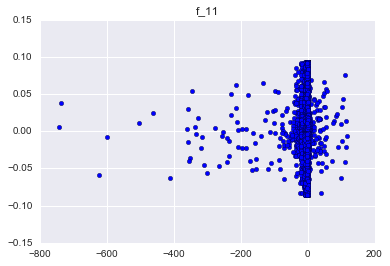

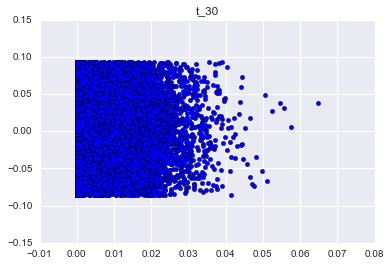

In [48]:
for ft in feat_selected:
    plt.figure()
    ff = ef[(ef['y']<ymax-1e-4) & (ef['y']>ymin+1e-4)]
    plt.scatter(ff[ft], ff['y'])
    plt.title(ft)

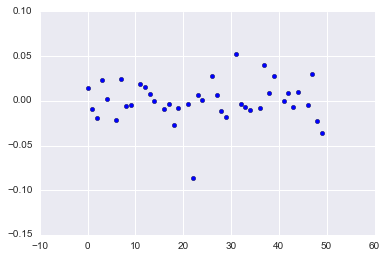

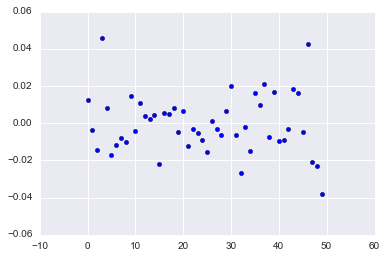

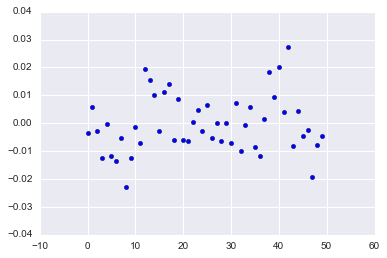

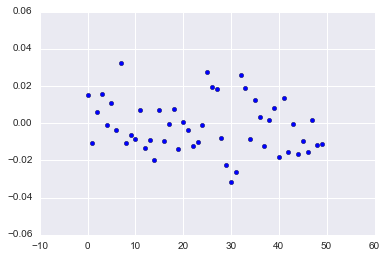

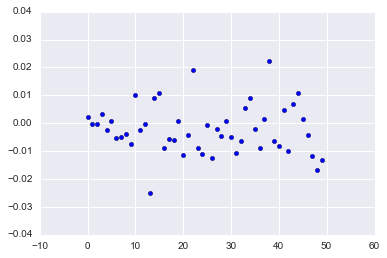

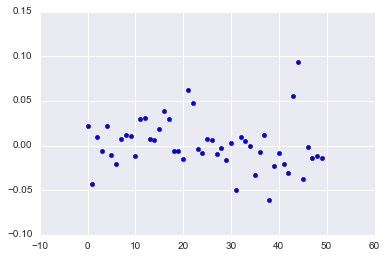

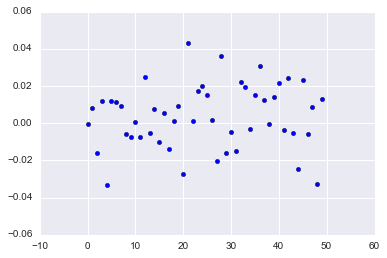

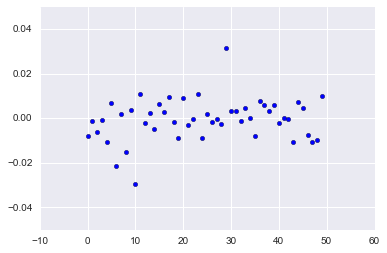

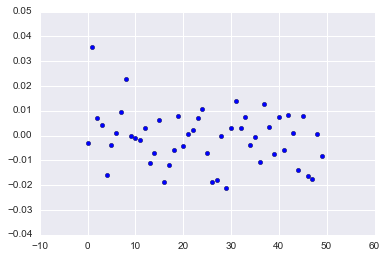

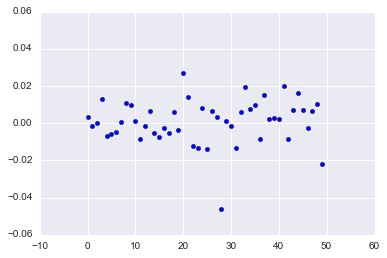

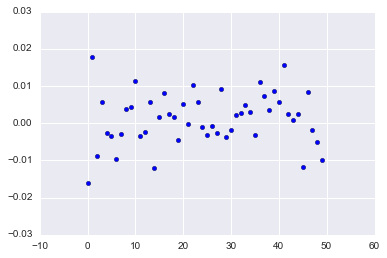

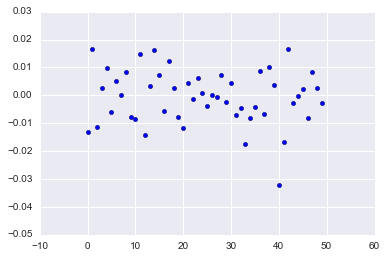

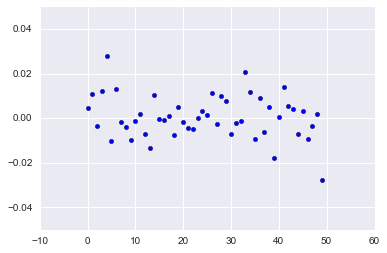

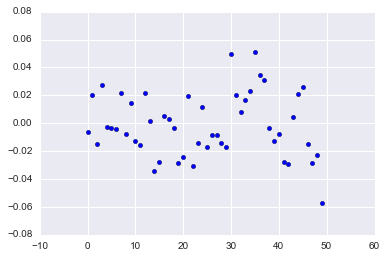

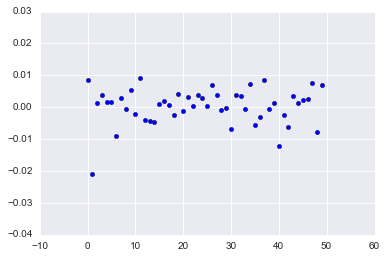

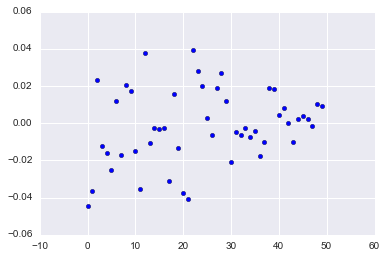

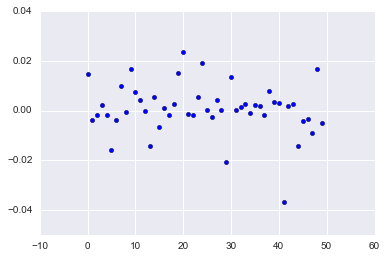

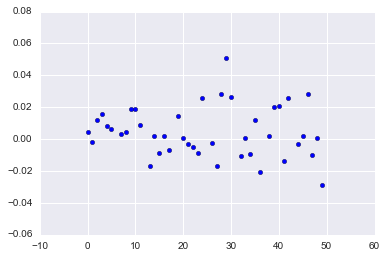

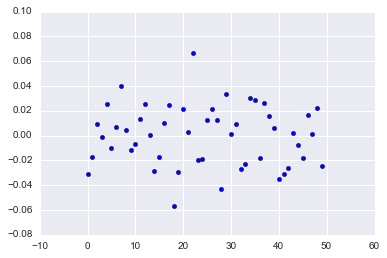

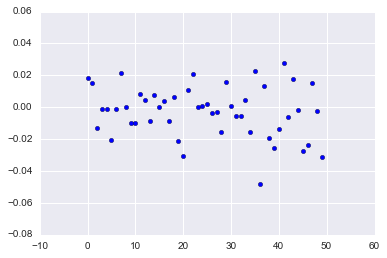

In [60]:
for dd in ef['id'].unique()[:20]:
    ff = ef[(ef['id']==dd) & (ef['t_20']>0) &ef['y'].notnull() &ef['t_20'].notnull()]
    if len(ff)== 0:
        continue
        
    plt.figure()
    du.group_scatter(ff['t_20'], ff['y'])